<a href="https://colab.research.google.com/github/lashkoEv/Deep_learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


# Завантаження данних

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


# Виведення частини зображень

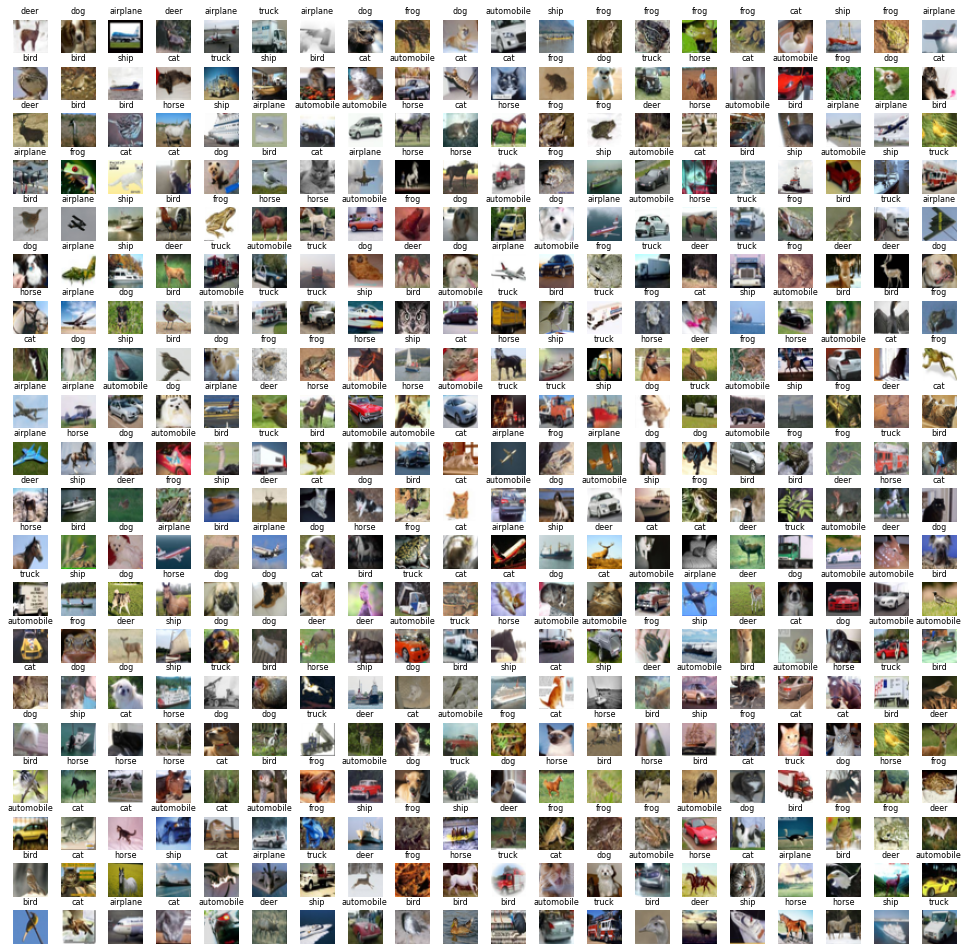

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(20, 20, figsize = (17,17))

axes = axes.ravel()

n_train = len(X_train)

for i in np.arange(0, 20 * 20):
    index = np.random.randint(0, n_train)   
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


# Масштабування

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Побудова моделі

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Epoch 1/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.5110 - accuracy: 0.4479 - precision: 0.6779 - recall: 0.2320 - val_loss: 1.1806 - val_accuracy: 0.5846 - val_precision: 0.7362 - val_recall: 0.4244
Epoch 2/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.1147 - accuracy: 0.6023 - precision: 0.7417 - recall: 0.4579 - val_loss: 1.0697 - val_accuracy: 0.6264 - val_precision: 0.7181 - val_recall: 0.5444
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.9688 - accuracy: 0.6573 - precision: 0.7720 - recall: 0.5441 - val_loss: 0.8645 - val_accuracy: 0.6939 - val_precision: 0.8034 - val_recall: 0.5899
Epoch 4/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8876 - accuracy: 0.6903 - precision: 0.7932 - recall: 0.5908 - val_loss: 0.7750 - val_accuracy: 0.7248 - val_precision: 0.8056 - val_recall: 0.6509
Epoch 5/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8182 - a

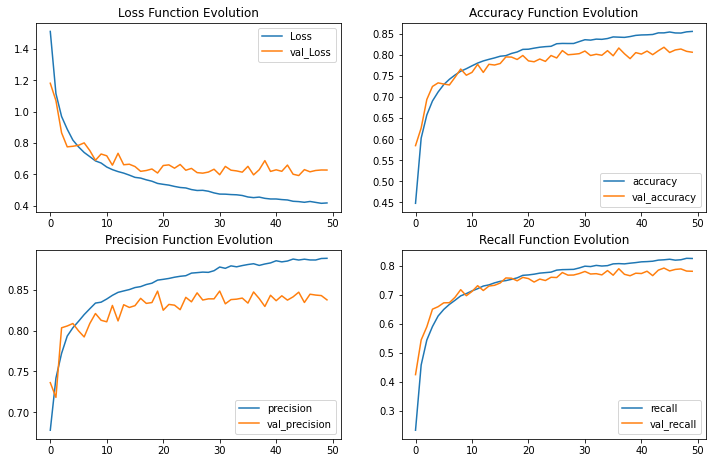

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]);

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train_categorical, batch_size)

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=(X_train.shape[0] // batch_size),
              validation_data=(X_test, y_test_categorical)
             )

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(X_test, y_test_categorical)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

Epoch 1/50
1562/1562 [==============================] - 34s 22ms/step - loss: 1.5696 - accuracy: 0.4219 - precision: 0.6683 - recall: 0.1992 - val_loss: 1.3502 - val_accuracy: 0.5309 - val_precision: 0.6837 - val_recall: 0.3910
Epoch 2/50
1562/1562 [==============================] - 33s 21ms/step - loss: 1.1090 - accuracy: 0.6031 - precision: 0.7534 - recall: 0.4520 - val_loss: 0.9717 - val_accuracy: 0.6560 - val_precision: 0.7758 - val_recall: 0.5429
Epoch 3/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.9467 - accuracy: 0.6655 - precision: 0.7872 - recall: 0.5478 - val_loss: 0.9025 - val_accuracy: 0.6871 - val_precision: 0.7981 - val_recall: 0.5875
Epoch 4/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.8464 - accuracy: 0.7015 - precision: 0.8033 - recall: 0.6035 - val_loss: 0.7936 - val_accuracy: 0.7215 - val_precision: 0.8060 - val_recall: 0.6550
Epoch 5/50
1562/1562 [==============================] - 32s 21ms/step - loss: 0.7798 - a

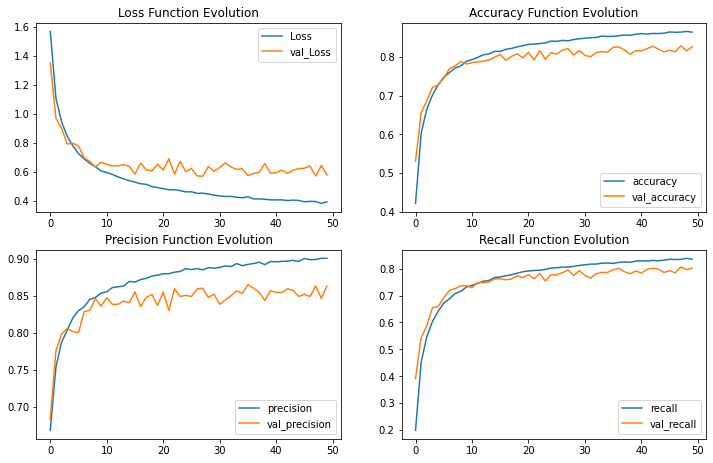

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]);

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train_categorical, batch_size)

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=(X_train.shape[0] // batch_size),
              validation_data=(X_test, y_test_categorical)
             )

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(X_test, y_test_categorical)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

Epoch 1/50
1562/1562 [==============================] - 34s 21ms/step - loss: 1.4206 - accuracy: 0.4894 - precision: 0.6755 - recall: 0.3064 - val_loss: 1.3006 - val_accuracy: 0.5597 - val_precision: 0.6689 - val_recall: 0.4596
Epoch 2/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.9641 - accuracy: 0.6586 - precision: 0.7699 - recall: 0.5530 - val_loss: 1.0518 - val_accuracy: 0.6461 - val_precision: 0.7470 - val_recall: 0.5542
Epoch 3/50
1562/1562 [==============================] - 32s 21ms/step - loss: 0.8010 - accuracy: 0.7210 - precision: 0.8085 - recall: 0.6391 - val_loss: 0.7450 - val_accuracy: 0.7437 - val_precision: 0.8208 - val_recall: 0.6694
Epoch 4/50
1562/1562 [==============================] - 32s 21ms/step - loss: 0.7115 - accuracy: 0.7526 - precision: 0.8286 - recall: 0.6867 - val_loss: 0.7166 - val_accuracy: 0.7572 - val_precision: 0.8223 - val_recall: 0.7013
Epoch 5/50
1562/1562 [==============================] - 32s 21ms/step - loss: 0.6498 - a

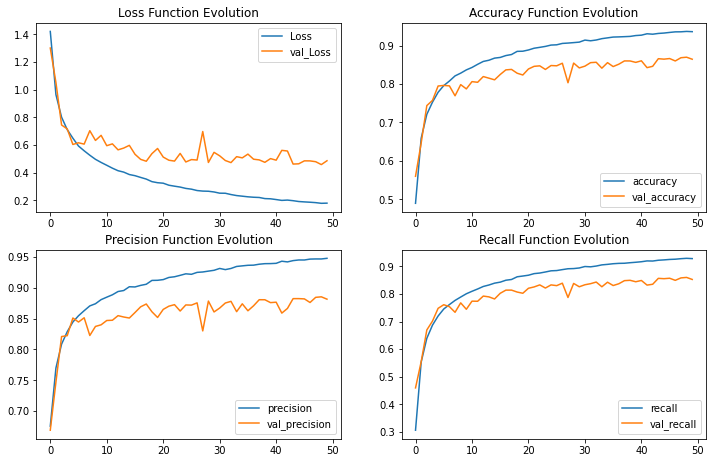

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]);

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train_categorical, batch_size)

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=(X_train.shape[0] // batch_size),
              validation_data=(X_test, y_test_categorical)
             )

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(X_test, y_test_categorical)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

Epoch 1/50
1562/1562 [==============================] - 36s 22ms/step - loss: 1.6131 - accuracy: 0.4177 - precision: 0.6234 - recall: 0.2112 - val_loss: 1.2577 - val_accuracy: 0.5565 - val_precision: 0.7372 - val_recall: 0.3863
Epoch 2/50
1562/1562 [==============================] - 33s 21ms/step - loss: 1.2000 - accuracy: 0.5765 - precision: 0.7338 - recall: 0.4191 - val_loss: 1.2495 - val_accuracy: 0.5767 - val_precision: 0.6795 - val_recall: 0.4890
Epoch 3/50
1562/1562 [==============================] - 34s 22ms/step - loss: 1.0252 - accuracy: 0.6445 - precision: 0.7709 - recall: 0.5132 - val_loss: 0.8742 - val_accuracy: 0.6938 - val_precision: 0.8085 - val_recall: 0.5932
Epoch 4/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.9317 - accuracy: 0.6801 - precision: 0.7929 - recall: 0.5672 - val_loss: 0.8664 - val_accuracy: 0.7014 - val_precision: 0.7827 - val_recall: 0.6289
Epoch 5/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.8502 - a

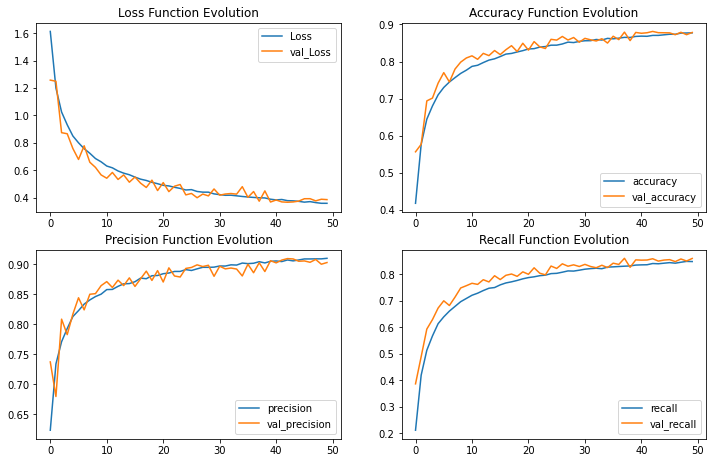

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
]);

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train_categorical, batch_size)

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=(X_train.shape[0] // batch_size),
              validation_data=(X_test, y_test_categorical)
             )

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(X_test, y_test_categorical)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

# Аугментація

Epoch 1/20
1562/1562 [==============================] - 40s 25ms/step - loss: 1.5874 - accuracy: 0.4252 - precision: 0.6319 - recall: 0.2164 - val_loss: 1.4965 - val_accuracy: 0.5133 - val_precision: 0.6186 - val_recall: 0.4158
Epoch 2/20
1562/1562 [==============================] - 37s 23ms/step - loss: 1.1911 - accuracy: 0.5784 - precision: 0.7367 - recall: 0.4212 - val_loss: 1.1289 - val_accuracy: 0.6249 - val_precision: 0.7135 - val_recall: 0.5299
Epoch 3/20
1562/1562 [==============================] - 33s 21ms/step - loss: 0.9910 - accuracy: 0.6563 - precision: 0.7807 - recall: 0.5359 - val_loss: 0.9627 - val_accuracy: 0.6818 - val_precision: 0.7635 - val_recall: 0.6014
Epoch 4/20
1562/1562 [==============================] - 33s 21ms/step - loss: 0.8840 - accuracy: 0.6936 - precision: 0.8035 - recall: 0.5939 - val_loss: 0.7902 - val_accuracy: 0.7303 - val_precision: 0.8118 - val_recall: 0.6518
Epoch 5/20
1562/1562 [==============================] - 33s 21ms/step - loss: 0.8153 - a

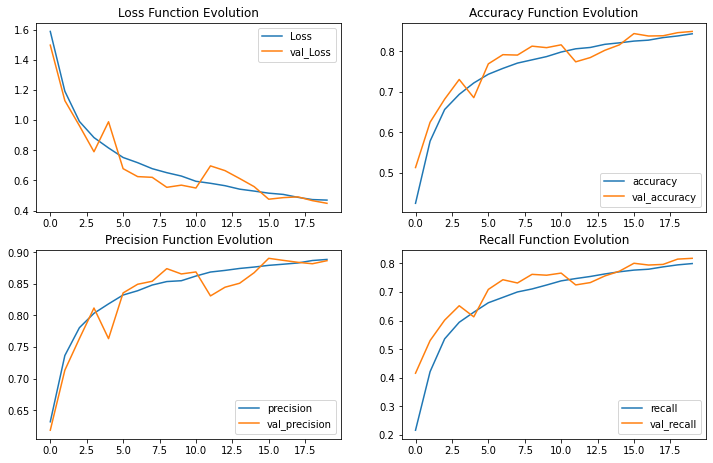

In [ ]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train_categorical, batch_size)

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
]);

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])


r = model.fit(train_generator, 
              epochs=20,
              steps_per_epoch=(X_train.shape[0] // batch_size),
              validation_data=(X_test, y_test_categorical)
             )

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

# Transfer learning

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top=False,
                                        weights='imagenet',
                                        input_shape=(32,32,3),
                                        pooling='max')

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [ ]:
out = base_model.output
out = Flatten()(out)
out = Dense(128, activation='relu')(out)
out = Dropout(0.2)(out)
out = Dense(10, activation='softmax')(out)

model = tf.keras.Model(inputs=base_model.inputs, outputs=out)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                            

Epoch 1/20
1563/1563 [==============================] - 122s 71ms/step - loss: 1.3478 - accuracy: 0.5321 - precision: 0.7089 - recall: 0.3621 - val_loss: 1.5057 - val_accuracy: 0.5132 - val_precision: 0.6014 - val_recall: 0.4360
Epoch 2/20
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3041 - accuracy: 0.5442 - precision: 0.7170 - recall: 0.3691 - val_loss: 1.1764 - val_accuracy: 0.5843 - val_precision: 0.7325 - val_recall: 0.4363
Epoch 3/20
1563/1563 [==============================] - 106s 68ms/step - loss: 1.2068 - accuracy: 0.5791 - precision: 0.7402 - recall: 0.4238 - val_loss: 1.5888 - val_accuracy: 0.4437 - val_precision: 0.5702 - val_recall: 0.3442
Epoch 4/20
1563/1563 [==============================] - 102s 65ms/step - loss: 1.1666 - accuracy: 0.5906 - precision: 0.7481 - recall: 0.4456 - val_loss: 0.8961 - val_accuracy: 0.6822 - val_precision: 0.7789 - val_recall: 0.5963
Epoch 5/20
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3019

Text(0.5, 1.0, 'Training and validation loss')

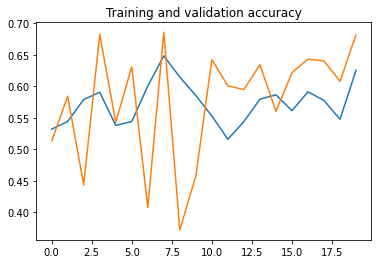

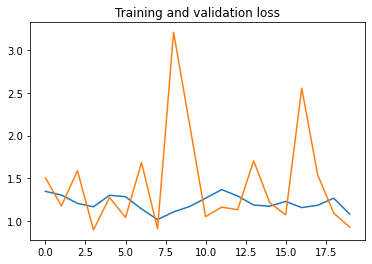

In [ ]:
h = model.fit(train_generator, 
              epochs=20,
              steps_per_epoch=len(train_generator),
              validation_data=(X_test, y_test_categorical),
              validation_steps=len((X_test, y_test_categorical)),
              verbose=1
             )

acc      = h.history[     'accuracy' ]
val_acc  = h.history[ 'val_accuracy' ]
loss     = h.history[    'loss' ]
val_loss = h.history['val_loss' ]

epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

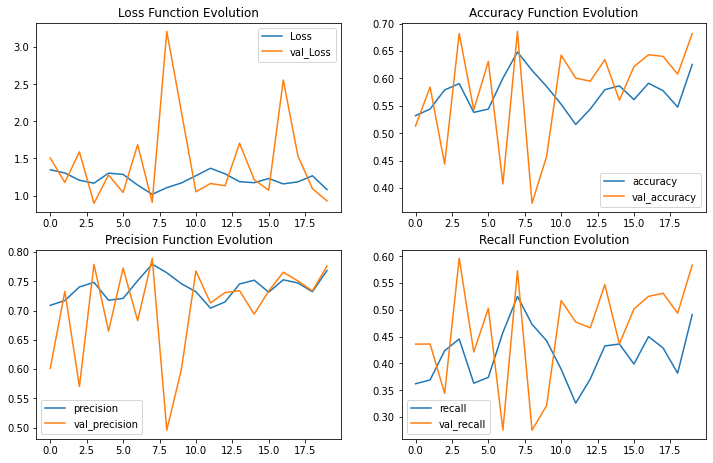

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(h.history['loss'], label='Loss')
plt.plot(h.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(h.history['precision'], label='precision')
plt.plot(h.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(h.history['recall'], label='recall')
plt.plot(h.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(X_test, y_test_categorical)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

In [ ]:
evaluation = model.evaluate(X_test, y_test_categorical)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 8s 19ms/step - loss: 0.9280 - accuracy: 0.6818 - precision: 0.7758 - recall: 0.5835
Test Accuracy : 68.18%
